$$
\frac{d W}{d p} = \left( \frac{2 p}{p^2 + Q} - \frac{1}{p} \right) W - \frac{W^2}{p} + p Q (p^2 + Q)
$$

$$
W(\infty) = - Q^{1/2} p^2 - \frac{1}{2}
$$

In [50]:
using Plots, DifferentialEquations, LaTeXStrings, Printf

# Define the ODE function with parameters
f(w, p, t) = ((2t)/(t^2+p[1]) - (1/t))*w - (w^2/t) + t*p[1]*(t^2+p[1])

# Q values (logarithmically spaced)
Q_values = 10.0 .^ range(-4, 0, length=150)

# Arrays to store results
logQ_values = log10.(Q_values)
logDelta_values = similar(Q_values)

# Time span (integrating backward in "time" t)
tspan = (20.0, 1e-8)  # Avoid t=0 to prevent division by zero

for (i, Q) in enumerate(Q_values)
    # Initial condition
    w0 = -sqrt(Q) * tspan[1]^2 - 0.5
    
    # Create the ODE problem with parameters
    prob = ODEProblem(f, w0, tspan, [Q])
    
    try
        # Solve with a stiff solver (Rodas5 is good for stiff problems)
        sol = solve(prob, Rodas5(), reltol=1e-8, abstol=1e-8)
        
        # Compute W'(t) at the smallest t in the solution (near t=0)
        t_min = minimum(sol.t)  # Closest point to t=0 (e.g., t=1e-6)
        W_prime_near_0 = sol(t_min, Val{1})  # First derivative at t_min
        
        # Extrapolate W'(0) ≈ W'(t_min) + O(t_min) (assumes W' is finite at t=0)
        W_prime_0 = W_prime_near_0  # Or refine with fitting if needed
        
        # Compute π / W'(0)
        Δhat = π / W_prime_0
        
        logDelta_values[i] = log10(abs(Δhat))
    catch e
        @warn "Failed for Q = $Q: $e"
        logDelta_values[i] = NaN
    end
end

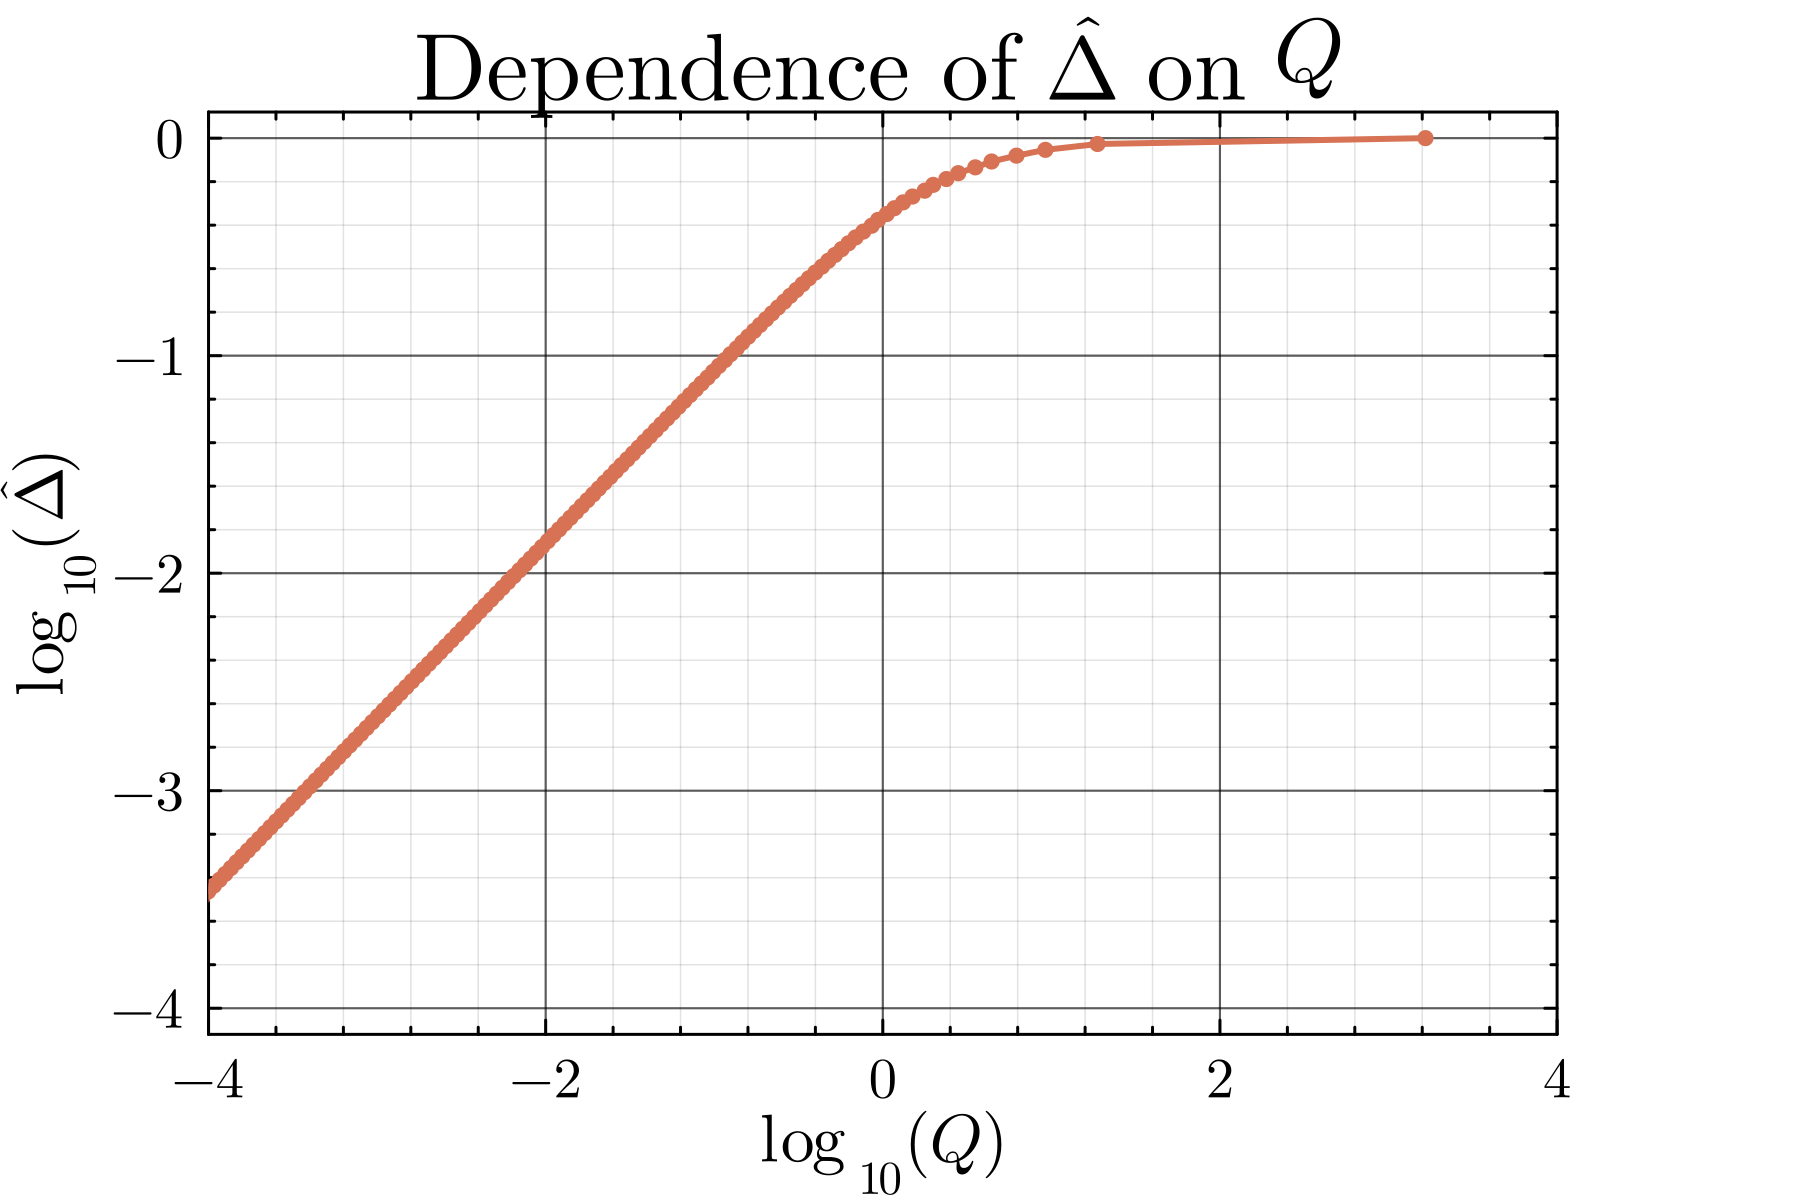

In [ ]:
# Create the plot
plot(logDelta_values, logQ_values,
    ylabel=L"\log_{10}(Q)", 
    xlabel=L"\log_{10}(\hat{\Delta})",
    label="",
    title=L"Dependence of $\hat{\Delta}$ on $Q$",
    linewidth=2,
    markersize=3,
    markershape=:circle,
    markercolor=:auto, 
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    dpi=300,
    xlims=(-4, 4)
    )